In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras 
import seaborn as sns

In [2]:
import os
path,dir,files = next(os.walk('train'))
file_count = len(files)
print("Number of images: ",file_count)

Number of images:  25000


In [3]:
filenames = os.listdir('train/')
# print(filenames)

In [4]:
from PIL import Image
import matplotlib.image as mpimg
import cv2

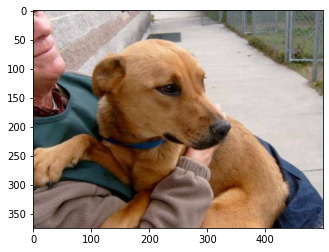

In [5]:
img = mpimg.imread(r'train/dog.12067.jpg')
imgplot = plt.imshow(img)
plt.show()

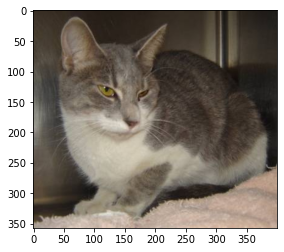

In [6]:
img = mpimg.imread(r'train/cat.4352.jpg')
imgplot = plt.imshow(img)
plt.show()

In [7]:
dog = []
cat = []
for files in filenames:
    if files[0:3] == 'cat':
        cat.append(files)
    else:
        dog.append(files)
print(len(dog),len(cat))

12500 12500


Resizing all the images

In [8]:
# os.mkdir('images_resized')
original_path = 'train'
new_path = 'images_resized/'

In [9]:
# for i in range(len(filenames)):
#     filename = os.listdir(path)[i]
#     f_img = path+"/"+filename
#     img = Image.open(f_img)
#     img = img.resize((224, 224)) #(width, height)
#     img = img.convert('RGB')
#     new_img_path = new_path+'/'+filename
#     img.save(new_img_path)

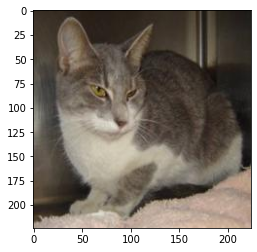

In [10]:
img = mpimg.imread(r'images_resized/cat.4352.jpg')
imgplot = plt.imshow(img)
plt.show()

Creating lables for resized images

Cat ---> 0

Dog ---> 1

In [11]:
labels = []

for i in range(0,len(filenames)):
    file = filenames[i]
    if file[0:3] == 'cat':
        labels.append(0)
    else:
        labels.append(1)

In [12]:
labels.count(1)

12500

In [13]:
filenames = os.listdir('combined_resized/')

In [14]:
labels = []

for i in range(0,len(filenames)):
    file = filenames[i]
    if file[0:3] == 'cat':
        labels.append(0)
    else:
        labels.append(1)

In [15]:
labels.count(1), labels.count(0)

(1000, 1000)

In [16]:
import glob

In [17]:
image_directory = 'combined_resized/'
image_extensions = ['png','jpg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extensions]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [18]:
# dog_cat_images

In [19]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [20]:
X = dog_cat_images
Y = np.asarray(labels)

In [21]:
Y

array([0, 0, 0, ..., 1, 1, 1])

Train Test Split

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=35,stratify=Y)

In [23]:
Y_train.shape,Y_test.shape

((1600,), (400,))

In [24]:
print(np.count_nonzero(Y_train))

800


In [25]:
print(np.count_nonzero(Y_test))

200


In [26]:
X_train_scaled = X_train/255

In [27]:
X_test_scaled = X_test/255

Building the NN

In [28]:
import tensorflow_hub as hub

In [29]:
mobile_net_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobile_net_model,input_shape=(224,224,3),trainable=False)

In [30]:
number_of_classes = 2

model = tf.keras.Sequential([pretrained_model,tf.keras.layers.Dense(number_of_classes)])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [31]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [32]:
model.fit(X_train_scaled,Y_train,epochs=20)

Epoch 1/20
50/50 [==============================] - 19s 72ms/step - loss: 0.1554 - acc: 0.9438
Epoch 2/20
50/50 [==============================] - 4s 73ms/step - loss: 0.0655 - acc: 0.9769
Epoch 3/20
50/50 [==============================] - 4s 74ms/step - loss: 0.0488 - acc: 0.9806
Epoch 4/20
50/50 [==============================] - 4s 73ms/step - loss: 0.0375 - acc: 0.9881
Epoch 5/20
50/50 [==============================] - 4s 73ms/step - loss: 0.0293 - acc: 0.9931
Epoch 6/20
50/50 [==============================] - 4s 73ms/step - loss: 0.0255 - acc: 0.9937
Epoch 7/20
50/50 [==============================] - 4s 73ms/step - loss: 0.0221 - acc: 0.9956
Epoch 8/20
50/50 [==============================] - 4s 74ms/step - loss: 0.0165 - acc: 0.9981
Epoch 9/20
50/50 [==============================] - 4s 74ms/step - loss: 0.0143 - acc: 0.9981
Epoch 10/20
50/50 [==============================] - 4s 74ms/step - loss: 0.0130 - acc: 1.0000
Epoch 11/20
50/50 [==============================] - 4s 76

In [33]:
!nvidia-smi

Thu Aug  4 17:30:19 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.59       Driver Version: 516.59       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   53C    P3    11W /  N/A |   2826MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [34]:
score,acc = model.evaluate(X_test_scaled,Y_test)
print("Test Loss = ",score)
print("Test Acc = ",acc)

13/13 [==============================] - 3s 134ms/step - loss: 0.0592 - acc: 0.9775
Test Loss =  0.05917041003704071
Test Acc =  0.9775000214576721


DOG


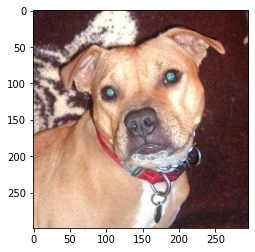

In [35]:
img_test = cv2.imread(r'D:\Machine Learning Projects\Dog-vs-Cat-Classification\test1\2.jpg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(r'D:\Machine Learning Projects\Dog-vs-Cat-Classification\test1\2.jpg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)

if input_label == 1:
    print("DOG")
else:
    print("CAT")

CAT


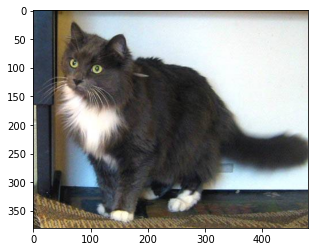

In [36]:
img_test = cv2.imread(r'D:\Machine Learning Projects\Dog-vs-Cat-Classification\test1\9.jpg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread(r'D:\Machine Learning Projects\Dog-vs-Cat-Classification\test1\9.jpg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)

if input_label == 1:
    print("DOG")
else:
    print("CAT")